# Imports 

In [304]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
# Change datatype of columns to the appripriate ones
import pre_processing as prep
import time
import datetime



Upload the data into the notebook

In [43]:
df = pd.read_csv("./impute_loan_payments")

In [44]:
df_p = prep.DataTransform(df)

Convert the columns to their correct data type

In [46]:
# Transform columns into the categorical data type
df_p.category_transform(["grade", "sub_grade", "home_ownership", "verification_status", "loan_status", "payment_plan", "purpose", "application_type", "employment_length", "policy_code"])

,id,member_id,loan_amount,funded_amount,funded_amount_inv,term_in_months,int_rate,instalment,grade,sub_grade,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,next_payment_date,last_credit_pull_date,collections_12_mths_ex_med,policy_code,application_type
0,38676116,41461848,8000,8000.0,8000.0,36.0,7.49,248.82,A,A4,...,0.000000,0.00,0.00,2022-01-01,248.82,2022-02-01,2022-01-01,0.0,1,INDIVIDUAL
1,38656203,41440010,13200,13200.0,13200.0,36.0,6.99,407.52,A,A3,...,0.000000,0.00,0.00,2022-01-01,407.52,2022-02-01,2022-01-01,0.0,1,INDIVIDUAL
2,38656154,41439961,16000,16000.0,16000.0,36.0,7.49,497.63,A,A4,...,0.000000,0.00,0.00,2021-10-01,12850.16,NaN,2021-10-01,0.0,1,INDIVIDUAL
3,38656128,41439934,15000,15000.0,15000.0,36.0,14.31,514.93,C,C4,...,0.000000,0.00,0.00,2021-06-01,13899.67,NaN,2021-06-01,0.0,1,INDIVIDUAL
4,38656121,41439927,15000,15000.0,15000.0,36.0,6.03,456.54,A,A1,...,0.000000,0.00,0.00,2022-01-01,456.54,2022-02-01,2022-01-01,0.0,1,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54226,76597,76583,5000,5000.0,1775.0,36.0,9.01,159.03,B,B2,...,0.000000,0.00,0.00,2016-07-01,160.61,NaN,2016-07-01,0.0,1,INDIVIDUAL
54227,142608,74724,5000,5000.0,2350.0,36.0,10.59,162.73,C,C2,...,104.942381,0.00,0.00,2016-10-01,490.01,NaN,2016-09-01,0.0,1,INDIVIDUAL
54228,117045,70978,3500,3500.0,2225.0,36.0,7.43,108.77,A,A2,...,0.000000,0.00,0.00,2016-09-01,110.58,2016-09-01,2013-05-01,0.0,1,INDIVIDUAL
54229,88854,70699,5000,5000.0,225.0,36.0,7.43,155.38,A,A2,...,0.000000,0.00,0.00,2014-03-01,0.00,NaN,2013-05-01,0.0,1,INDIVIDUAL


In [47]:
# Convert columns to date type data
df_p.date_transform(["issue_date", "earliest_credit_line", "last_payment_date", "next_payment_date", "last_credit_pull_date"])

,id,member_id,loan_amount,funded_amount,funded_amount_inv,term_in_months,int_rate,instalment,grade,sub_grade,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,next_payment_date,last_credit_pull_date,collections_12_mths_ex_med,policy_code,application_type
0,38676116,41461848,8000,8000.0,8000.0,36.0,7.49,248.82,A,A4,...,0.000000,0.00,0.00,2022-01-01,248.82,2022-02-01,2022-01-01,0.0,1,INDIVIDUAL
1,38656203,41440010,13200,13200.0,13200.0,36.0,6.99,407.52,A,A3,...,0.000000,0.00,0.00,2022-01-01,407.52,2022-02-01,2022-01-01,0.0,1,INDIVIDUAL
2,38656154,41439961,16000,16000.0,16000.0,36.0,7.49,497.63,A,A4,...,0.000000,0.00,0.00,2021-10-01,12850.16,NaT,2021-10-01,0.0,1,INDIVIDUAL
3,38656128,41439934,15000,15000.0,15000.0,36.0,14.31,514.93,C,C4,...,0.000000,0.00,0.00,2021-06-01,13899.67,NaT,2021-06-01,0.0,1,INDIVIDUAL
4,38656121,41439927,15000,15000.0,15000.0,36.0,6.03,456.54,A,A1,...,0.000000,0.00,0.00,2022-01-01,456.54,2022-02-01,2022-01-01,0.0,1,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54226,76597,76583,5000,5000.0,1775.0,36.0,9.01,159.03,B,B2,...,0.000000,0.00,0.00,2016-07-01,160.61,NaT,2016-07-01,0.0,1,INDIVIDUAL
54227,142608,74724,5000,5000.0,2350.0,36.0,10.59,162.73,C,C2,...,104.942381,0.00,0.00,2016-10-01,490.01,NaT,2016-09-01,0.0,1,INDIVIDUAL
54228,117045,70978,3500,3500.0,2225.0,36.0,7.43,108.77,A,A2,...,0.000000,0.00,0.00,2016-09-01,110.58,2016-09-01,2013-05-01,0.0,1,INDIVIDUAL
54229,88854,70699,5000,5000.0,225.0,36.0,7.43,155.38,A,A2,...,0.000000,0.00,0.00,2014-03-01,0.00,NaT,2013-05-01,0.0,1,INDIVIDUAL


# Current state of the loan

#### Calculate the percentage of the loans recovered against the investor funding

In [190]:
round(df["total_payment"].sum()/df["funded_amount_inv"].sum()*100, 2)


93.26

Create a dataframe to veisualise the percentage and visualise it using seaborn.

In [ ]:
df_inv = pd.DataFrame({"Type": "Loans", 
                       "Funded_by_investors":[df["funded_amount_inv"].sum()/df["funded_amount_inv"].sum()*100], 
                       "Repaid":[df["total_payment"].sum()/df["funded_amount_inv"].sum()*100]})

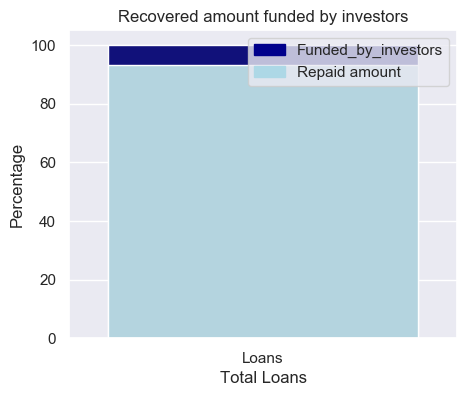

In [316]:
# Set the figure size
plt.figure(figsize=(5, 4))

# Create barplots, which will be stack on top of each other
bar1 = sns.barplot(x="Type",  y="Funded_by_investors", data=df_inv, color='darkblue')
bar2 = sns.barplot(x="Type", y="Repaid", data=df_inv, estimator=sum, ci=None,  color='lightblue')


# Create legends
top_bar = mpatches.Patch(color='darkblue', label='Funded_by_investors')
bottom_bar = mpatches.Patch(color='lightblue', label='Repaid amount')
plt.legend(handles=[top_bar, bottom_bar])

# Create tittle and labels
plt.title("Recovered amount funded by investors")
plt.ylabel("Percentage")
plt.xlabel("Total Loans")
plt.grid(True, axis="y") 
plt.show()

# show the graph
plt.show()

#### Calculate the percentage of the loans  recovered against the total amount funded

In [318]:
round(df["total_payment"].sum()/df["funded_amount"].sum()*100)


92

In [319]:
df_funded= pd.DataFrame({"Type": "Loans", 
                       "Total_funded":[df["funded_amount"].sum()/df["funded_amount"].sum()*100], 
                       "Repaid":[df["total_payment"].sum()/df["funded_amount"].sum().sum()*100]})

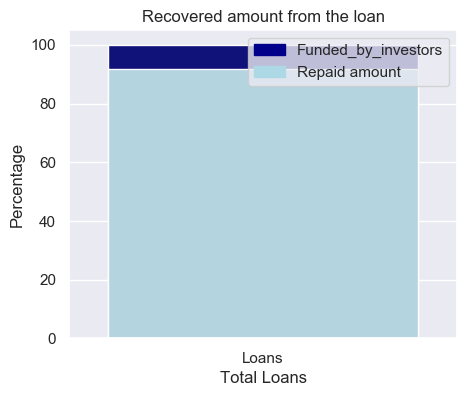

In [321]:
# Set the figure size
plt.figure(figsize=(5, 4))

# Create barplots, which will be stack on top of each other
bar1 = sns.barplot(x="Type",  y="Total_funded", data=df_funded, color='darkblue')
bar2 = sns.barplot(x="Type", y="Repaid", data=df_funded, estimator=sum, ci=None,  color='lightblue')


# Create legends
top_bar = mpatches.Patch(color='darkblue', label='Funded_by_investors')
bottom_bar = mpatches.Patch(color='lightblue', label='Repaid amount')
plt.legend(handles=[top_bar, bottom_bar])

# Create tittle and labels
plt.title("Recovered amount from the loan")
plt.ylabel("Percentage")
plt.xlabel("Total Loans")
plt.grid(True, axis="y") 
plt.show()

# show the graph
plt.show()

#### Calculate th percentage of the total amount would be recovered up to 6 months' in the future.

Calculate the number of months that the clients are left to pay.

In [342]:
# Get the number of months alrady paid
df["remaining_monhts_to_pay"] = df["term_in_months"] - round((df["last_payment_date"] - df["issue_date"])/np.timedelta64(1, 'M'),)

Convert any nagative values to zero.

In [343]:

# turn any negative values to 0
df["remaining_monhts_to_pay"] = df["remaining_monhts_to_pay"].clip(lower=0)

Calculate the total payments that the cleitns still owe.

In [354]:
# Amount paid in 6 months
df["projection"] = df["remaining_monhts_to_pay"] * df["instalment"]

Replace nulls for 0.

In [506]:
# Rremove nulls
df["projection"] = df["projection"].fillna(0.0)

Filter the date for rows that still have 6 or less months to pay.

In [360]:
df_6months = df[df["remaining_monhts_to_pay"]<=6]

Calculate the percentage recoved of the toatal loan amount on the next 6 months.

In [361]:
df_6months["projection"].sum()/df["funded_amount"].sum()*100

0.4069480931674659

Create a datafraem to visualise it.

In [362]:
df_projection= pd.DataFrame({"Type": "Loans", 
                       "Total_funded":[df["funded_amount"].sum()/df["funded_amount"].sum()*100], 
                       "Repaid":[df_6months["projection"].sum()/df["funded_amount"].sum().sum()*100]})

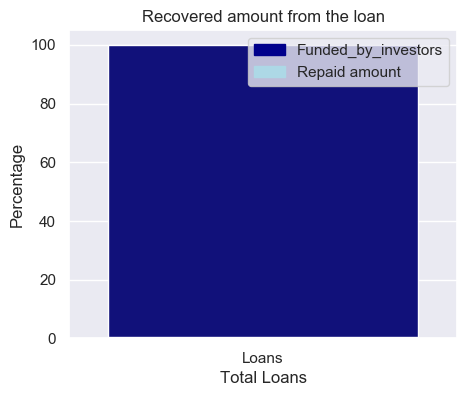

In [363]:
# Set the figure size
plt.figure(figsize=(5, 4))

# Create barplots, which will be stack on top of each other
bar1 = sns.barplot(x="Type",  y="Total_funded", data=df_projection, color='darkblue')
bar2 = sns.barplot(x="Type", y="Repaid", data=df_projection, estimator=sum, ci=None,  color='lightblue')


# Create legends
top_bar = mpatches.Patch(color='darkblue', label='Funded_by_investors')
bottom_bar = mpatches.Patch(color='lightblue', label='Repaid amount')
plt.legend(handles=[top_bar, bottom_bar])

# Create tittle and labels
plt.title("Recovered amount from the loan")
plt.ylabel("Percentage")
plt.xlabel("Total Loans")
plt.grid(True, axis="y") 
plt.show()

# show the graph
plt.show()

#### Calculating loss

Calculate number of mohts alrady paid

In [405]:
df_c_o = df[df["loan_status"] == "Charged Off"]
df_cha_ff=df_c_o.copy(deep=True)

Calculate the percentage of loans that had been charged off

In [387]:
round(len(df_cha_ff)/len(df[df["loan_status"] != "Charged Off"])*100)

11

Calculate percentange clients paid before the loan became charged off.

In [446]:
amount_paid = round(df_cha_ff["total_payment"].sum(), 2)
percentage_paid = round((df_cha_ff["total_payment"].sum()/df_cha_ff["loan_amount"].sum())*100,)


print(f"The total amount of loans paid by the clients before being charged off was {amount_paid}, which was {percentage_paid}% of the total funded amount of those loans.")

The total amount of loans paid by the clients before being charged off was 37400589.04, which was 36% of the total funded amount of those loans.


#### Calculating projected loss 

Calculate the total payment that would have recived from the loan rather than using the loan amount given to the client, since this amount will not reflect the revenue gain through inetrest rates. This can be calculated by multiplying the remaining months to pay by the instalment amount and then adding the results to the total payment made to date.

In [417]:
# This expected amount takes into account the interest gained
df_cha_ff["expected_amount"] = df_cha_ff["total_payment"] + df_cha_ff["projection"]


To calculate loss the amount paid until the last date will be subtracted from the total payment that the client should had made

In [499]:
per_rev_loss = round(df_cha_ff["projection"].sum()/df_cha_ff["expected_amount"].sum()*100)
per_rev_loss

64

In [500]:
df_p_l= pd.DataFrame({"Type": "Loans", 
                       "Expected_amount": [df_cha_ff["expected_amount"].sum()], 
                       "Loss":[df_cha_ff["projection"].sum()]})

df_p_l

,Type,Expected_amount,Loss
0,Loans,1.048607e+08,67460148.28


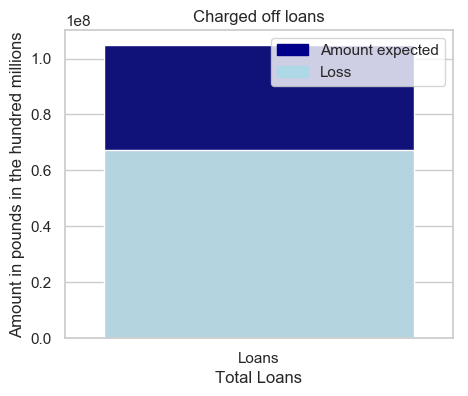

In [503]:
# Set the figure size
plt.figure(figsize=(5, 4))

# Create barplots, which will be stack on top of each other
bar1 = sns.barplot(x="Type",  y="Expected_amount", data=df_p_l, color='darkblue')
bar2 = sns.barplot(x="Type", y="Loss", data=df_p_l, estimator=sum, ci=None,  color='lightblue')


# Create legends
top_bar = mpatches.Patch(color='darkblue', label='Amount expected')
bottom_bar = mpatches.Patch(color='lightblue', label='Loss')
plt.legend(handles=[top_bar, bottom_bar])

# Create tittle and labels
plt.title("Charged off loans")
plt.ylabel("Amount in pounds in the hundred millions")
plt.xlabel("Total Loans")
plt.grid(True, axis="y") 
plt.show()

# show the graph
plt.show()

#### Possible loss

What percentage the loans are made off by clients that are behind their loan payments

In [535]:
# Filter for clients with late fees
df_late = df[(df["loan_status"] == "Late (31-120 days)") | (df["loan_status"] == "Late (16-30 days)")]

# use number of rows in datafrmes to calculate the percentages
per_late = round(len(df_late)/len(df)*100)

print(f"The percentage of of loans made up by clients who had pay late is {per_late}%.")

The percentage of of loans made up by clients who had pay late is 1%.


How many costumers are behind their loan payments

In [537]:
n_late_payments= len(df_late)
print(f"There are {n_late_payments} clients who had been late in their loan payments.")

There are 686 clients who had been late in their loan payments.


Calculate the loss if these costumers loans became charged off 

In [538]:
# Subtract the total payments made by the clients from the total loan amounts
loss_left_loan = round(df_late["loan_amount"].sum() - df_late["total_payment"].sum(), 2)
print(f"The company will loose £{loss_left_loan} if the clients with late loan payments become charged off.")

The company will loose £3408775.05 if the clients with late loan payments become charged off.


Calculate how much loss if costumer would have complete all of their payments

In [541]:
loss_pred_charged_if_off = round(df_late["projection"].sum(), 2)
print(f"The company will loose £{loss_pred_charged_if_off } from the remainder of the late payment loans if they become charged off.")

The company will loose £7130865.47 from the remainder of the late payment loans if they become charged off.


 What percentage of total expected revenue do these customers and the customers who have already defaulted on their loan represent?

In [545]:
default_loans = df[df["loan_status"] == "Default"]

In [546]:
# Calculate total expected revenue
total_ex_rev = df["projection"].sum()
off_late = df_late["projection"].sum() + default_loans["projection"].sum()


per_rev_offlate = round(off_late/total_ex_rev*100) 


print(f"The percentage of total expected revenue made of clients which loans have default and from those with late fees if there were chage to default would be {per_rev_offlate}%")


The percentage of total expected revenue made of clients which loans have default and from those with late fees if there were defaulted is 2%


In [543]:
df["loan_status"].value_counts()

Fully Paid                                             27037
Current                                                19268
Charged Off                                             5571
Does not meet the credit policy. Status:Fully Paid       984
Late (31-120 days)                                       580
Does not meet the credit policy. Status:Charged Off      368
In Grace Period                                          265
Late (16-30 days)                                        106
Default                                                   52
Name: loan_status, dtype: int64

#### Possible loss

Generated a correlation matrix to see which column are correlated with late fee and charged off.

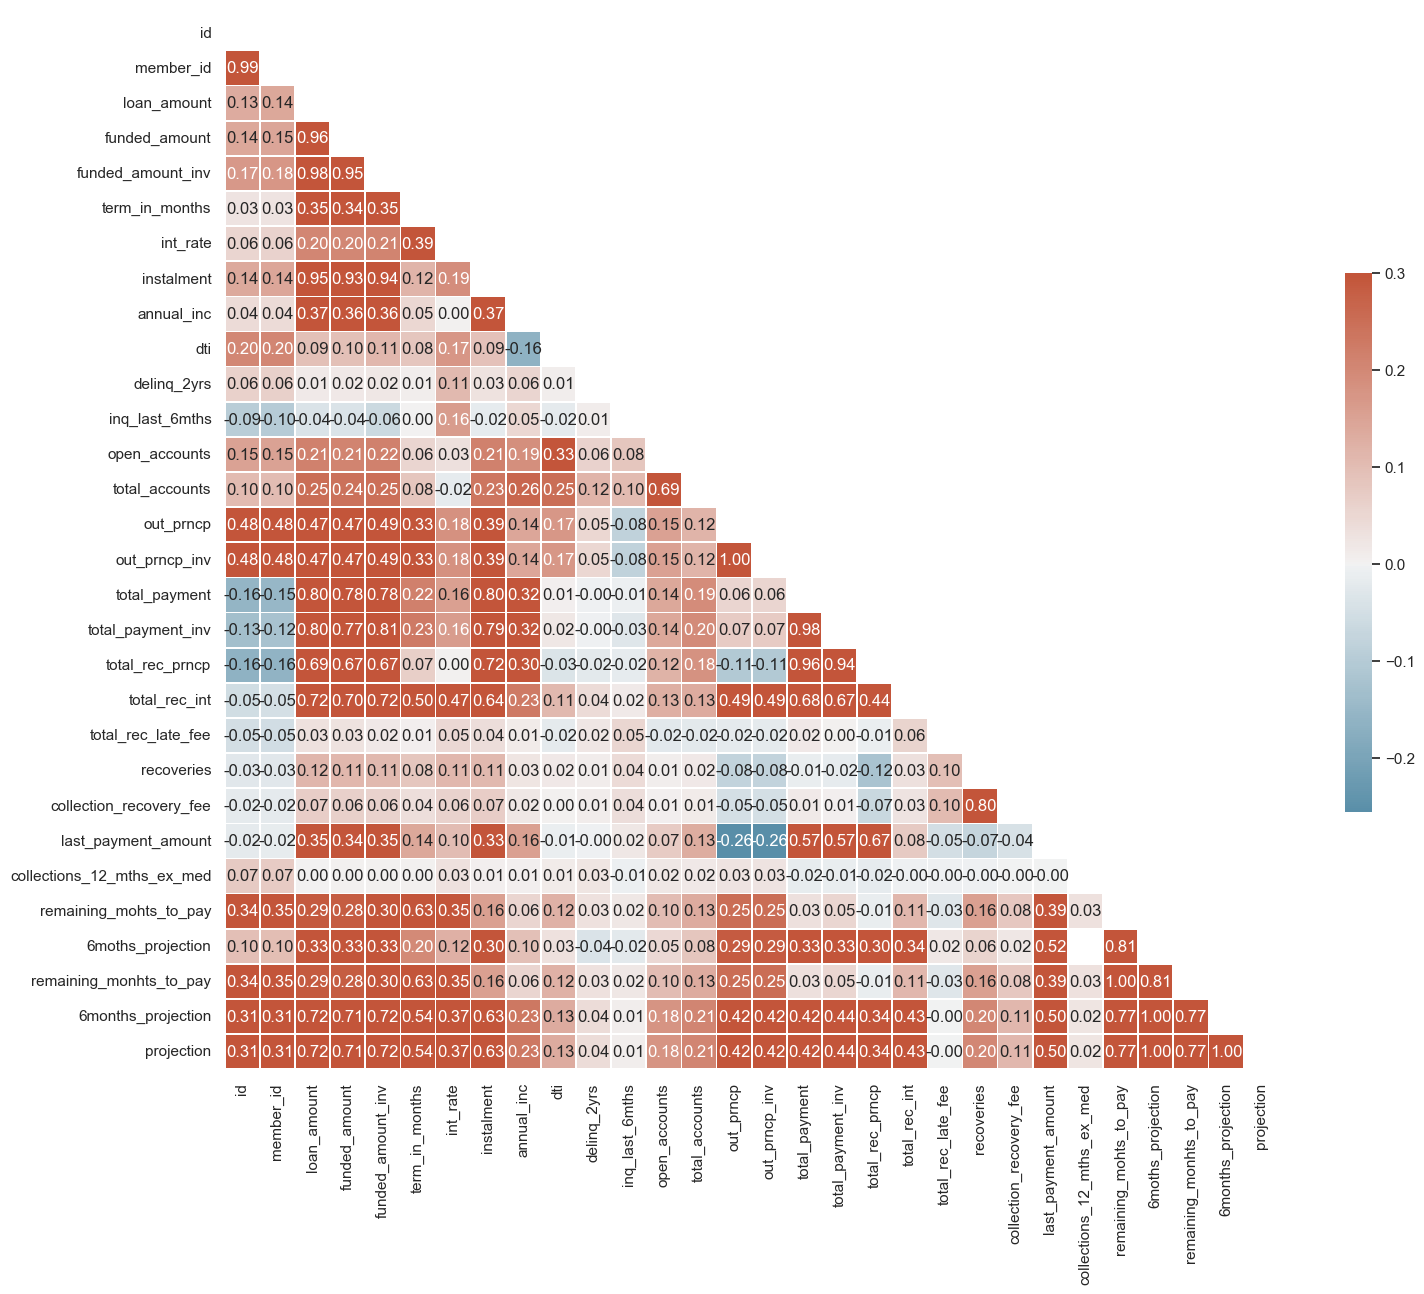

In [520]:
# Calculate correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(17, 14))

# Generate  a palette
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Generate heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

The correlation matric showed dosen't show a ny strong correlation between collection of late fees and other variables. Interestingly income,loans and funded amounts doen't seem to be correlated with late fees. The variables wiht the highest correlation 0.05 to late fees are interest rates, enquieres and total recived inetres. Therefore I will visualise columns on the charged off and late fees dataframes focusing in catgorical variables. 

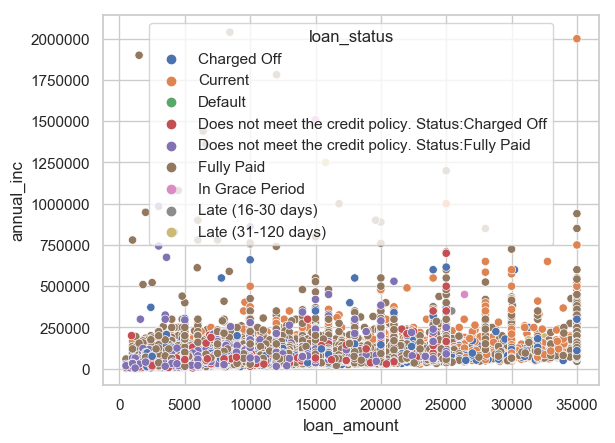

In [526]:
sns.scatterplot(x="loan_amount",
                    y="annual_inc",
                    data=df,
                    hue="loan_status")

